# The objective of this assignment is to predict the rating that a user will give to a book given their past book rating using recommender system algorithms. 

In [41]:
#import relevant datasets to perform recommendation system
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from surprise import SVD

In [2]:
# read dataset into pandas dataframe
df = pd.read_csv('train.csv/train.csv', delimiter= '\t')

In [3]:
df.head(10)

,user_id,book_id,rating
0,12726,7784,5
1,23770,104293,4
2,15669,29291,4
3,649,420180,0
4,10980,7089179,0
5,23252,30119,4
6,30950,27414384,0
7,28472,34268,5
8,20976,231850,0
9,2259,718473,0


In [4]:
df.shape

(700000, 3)

Text(0,0.5,'Count')

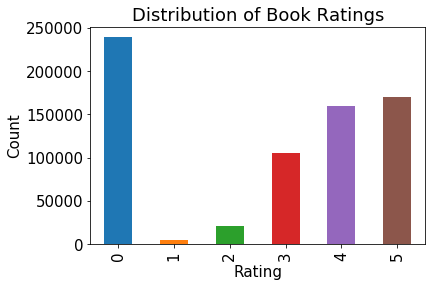

In [5]:
#plot a histogram to check how the ratings are distriburted
plt.rc("font",size =15)
df.rating.value_counts(sort =False).plot(kind = 'bar')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

In [6]:
#check how ratings are distributed based on count
rating_based_on_count = pd.DataFrame(df.groupby('book_id')['rating'].count())
rating_based_on_count.sort_values('rating', ascending= False).head(10)

,rating
book_id,
5,11213
3636,7885
24178,5252
157993,5127
2998,4926
30119,4347
370493,4215
8127,4139
38709,3546


In [7]:
#import surprise library algorithms 
from surprise import KNNBasic, BaselineOnly,Dataset, Reader

In [96]:
# convert data into reader class of surprise library to parse the ratings properly
reader = Reader(rating_scale=(0,5))  
data=Dataset.load_from_df(df,reader)

In [98]:
#import test train split to randomly split the data. I have used split size of 0.25
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25)

In [99]:
#Algorithm 1 - SVD. Fit the training data and check RMSE on validation data
svd_algo = SVD()
svd_algo.fit(trainset)
predictions_svd = svd_algo.test(testset)
accuracy.rmse(predictions_svd)

RMSE: 1.6081


1.6081413556288453

In [105]:
# import the test data in pandas dataframe
test = pd.read_csv('test.csv/test.csv', delimiter='\t')
test.head(5)

,user_id,book_id
0,20989,1832332
1,37040,191139
2,36167,28449164
3,9398,24693869
4,29848,8127


In [143]:
# Append the predictions of test data in res array 
res=[]
res.append('user_id-book_id,rating')
for i in range(len(test)):
    pred1 = svd_algo.predict(test['user_id'][i], test['book_id'][i])
    res.append(str(test['user_id'][i])+'-'+str(test['book_id'][i])+','+str(int(round(pred1[3]))))

In [146]:
len(res)

299607

In [161]:
#save the file on local machine
np.savetxt('pred', res,fmt='%s',newline='\n')

In [162]:
#Algorithm 2- KNNBasic
#fit the data using knnbasic algorithm on training dataset
knn_algo = KNNBasic()
knn_algo.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [163]:
#Make predictions for validation data and calculate RMSE
predictions = knn_algo.test(testset)
accuracy.rmse(predictions)

RMSE: 1.8077


1.8077244007696855

In [164]:
# Append the predictions of test data in res2 array 
res2=[]
res2.append('user_id-book_id,rating')
for i in range(len(test)):
    pred2 = knn_algo.predict(test['user_id'][i], test['book_id'][i])
    res2.append(str(test['user_id'][i])+'-'+str(test['book_id'][i])+','+str(int(round(pred2[3]))))

In [165]:
len(res)

299607

In [166]:
np.savetxt('pred_knn1', res,fmt='%s',newline='\n')

In [168]:
#Algorithm 3 - GridSearchCV
#import from library
from surprise.model_selection import GridSearchCV

# Parameter tuning using different parameter values
param_grid = {'n_epochs': [10,15,20], 'lr_all': [0.005, 0.001, 0.5, 0.1],
              'reg_all': [0.1,0.4]}
#fit the data using 3 -fold cross validation
gs_algo = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs_algo.fit(data)
print(gs_algo.best_score['rmse'])
print(gs_algo.best_params['rmse'])

1.5873074578528898
{'reg_all': 0.1, 'lr_all': 0.005, 'n_epochs': 20}


In [169]:
#more variations for parameter tuning
param_grid = {'n_epochs': [20,50,70,100], 'lr_all': [0.005],
              'reg_all': [0.005,0.1]}
gs1_algo = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs1_algo.fit(data)
print(gs1_algo.best_score['rmse'])
print(gs1_algo.best_params['rmse'])

1.5757201942337826
{'reg_all': 0.1, 'lr_all': 0.005, 'n_epochs': 50}


In [191]:
#use refit - True to fit data using best value of parameters in grid search
param_grid = {'n_epochs': [50], 'lr_all': [0.005],
              'reg_all': [0.1]}
gs2_algo = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, refit = True)
gs2_algo.fit(data)

In [192]:
#get predictions for test data based on tuned parameters and save in res6
res6=[]
res6.append('user_id-book_id,rating')
for i in range(len(test)):
    pred6 = gs2_algo.predict(test['user_id'][i], test['book_id'][i])
    res6.append(str(test['user_id'][i])+'-'+str(test['book_id'][i])+','+str(int(round(pred6[3]))))
np.savetxt('pred_gs', res6,fmt='%s',newline='\n')

In [170]:
# Algorithm 4 - KNNBasic
#we are using item-based collaborative filtering with pearson similarity
sim_ = { 'name': 'pearson', 'user_based': False}

In [172]:
#here we use KNN with k =3, fit the data and predict RMSE for validation data
knn1 = KNNBasic(sim_options=sim_,k=3,min_k=1)
knn1.fit(trainingSet)
predictions_knn = knn1.test(testSet)
accuracy.rmse(predictions_knn)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.7271


1.727124100569324

In [186]:
#Make predicions for test data 
res5=[]
res5.append('user_id-book_id,rating')
for i in range(len(test)):
    pred5 = knn1.predict(test['user_id'][i], test['book_id'][i])
    res5.append(str(test['user_id'][i])+'-'+str(test['book_id'][i])+','+str(int(round(pred5[3]))))

In [187]:
np.savetxt('pred_knn-3', res5,fmt='%s',newline='\n')

In [171]:
#Algorithm 5 - Baseline Approach
# For this approach I have used baseline method as als, number of epochs as 5, user regularization as 12 and item regularization as 5
#referred from Demo provided from NIraj in class
bsl_ = {'method': 'als','n_epochs': 5, 'reg_u': 12, 'reg_i': 5}, 

In [173]:
#fit data using baseline and predict RMSE for validation data
baseline_algo = BaselineOnly(bsl_options=bsl_)
baseline_algo.fit(trainingSet)
pred_baseline = baseline_algo.test(testSet)
accuracy.rmse(pred_baseline)

Estimating biases using als...
RMSE: 0.4199


0.4198887878728575

In [176]:
#Make predicions for test data 
res3=[]
res3.append('user_id-book_id,rating')
for i in range(len(test)):
    pred3 = baseline_algo.predict(test['user_id'][i], test['book_id'][i])
    res3.append(str(test['user_id'][i])+'-'+str(test['book_id'][i])+','+str(int(round(pred3[3]))))

In [182]:
np.savetxt('pred_baseline', res3,fmt='%s',newline='\n')

In [183]:
#Algorithm 6 - SVDpp
#import libraries
from surprise import SVDpp
#fit the data
svdpp_algo = SVDpp(n_factors=150,n_epochs=30)
svdpp_algo.fit(trainingSet)
#predict RMSE for validation data
pred_svdpp = svdpp_algo.test(testSet)
accuracy.rmse(pred_svdpp, verbose=True)

RMSE: 0.6498


0.6497871776043771

In [184]:
#Make predicions for test data 
res4=[]
res4.append('user_id-book_id,rating')
for i in range(len(test)):
    pred4 = svdpp_algo.predict(test['user_id'][i], test['book_id'][i])
    res4.append(str(test['user_id'][i])+'-'+str(test['book_id'][i])+','+str(int(round(pred4[3]))))

In [185]:
np.savetxt('pred_svdpp', res4,fmt='%s',newline='\n')